In [1]:
import matplotlib.pyplot as plt
from qibo import gates, models
from qibo.ui import plot_circuit

In [2]:
c = models.Circuit(5)
c.add(gates.CNOT(0, 2))
c.add(gates.CNOT(2, 4))
c.add(gates.CNOT(1, 3))
c.add(gates.X(0))
c.add(gates.CNOT(4, 3))
# c.add(gates.CNOT(1, 2))
# c.add(gates.CNOT(0, 1))
# c.add(gates.X(2))
# c.add(gates.H(0))
# c.add(gates.H(3))
# c.add(gates.CNOT(1, 0))
# c.add(gates.CNOT(3, 2))
# c.add(gates.CNOT(0, 3))

(<Axes: >, <Figure size 300x300 with 1 Axes>)

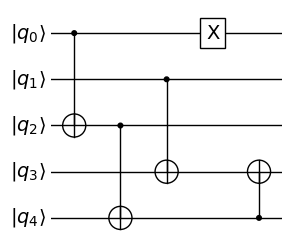

In [3]:
plot_circuit(c)

In [4]:
from CircuitTranspiler import CircuitTranspiler

timesteps = [
    [gates.CNOT(2, 0), gates.CNOT(3, 1)],
    [gates.X(0), gates.H(1)],
    [gates.CNOT(1, 4), gates.CNOT(0, 2), gates.H(3)],
    [gates.CNOT(4, 1), gates.X(2)],
    # [gates.CNOT(1, 3), gates.H(0)],
    # [gates.CNOT(0, 4), gates.CNOT(2, 3)],
    # [gates.X(4)],
    # [gates.CNOT(4, 0), gates.CNOT(1, 2)],
    # [gates.H(2), gates.H(0), gates.CNOT(3, 4)],
    # [gates.CNOT(3, 2)],
]

star_architecture = {0: [1, 2, 3, 4], 1: [0], 2: [0], 3: [0], 4: [0]}
initial_mapping = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
[2, 0]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
[3, 0, 1]
{0: 1, 1: 0, 2: 2, 3: 3, 4: 4}
{0: 1, 1: 0, 2: 2, 3: 3, 4: 4}
[1, 0, 2]
{0: 2, 1: 0, 2: 1, 3: 3, 4: 4}
{0: 2, 1: 0, 2: 1, 3: 3, 4: 4}
[4, 0]
{0: 2, 1: 0, 2: 1, 3: 3, 4: 4}


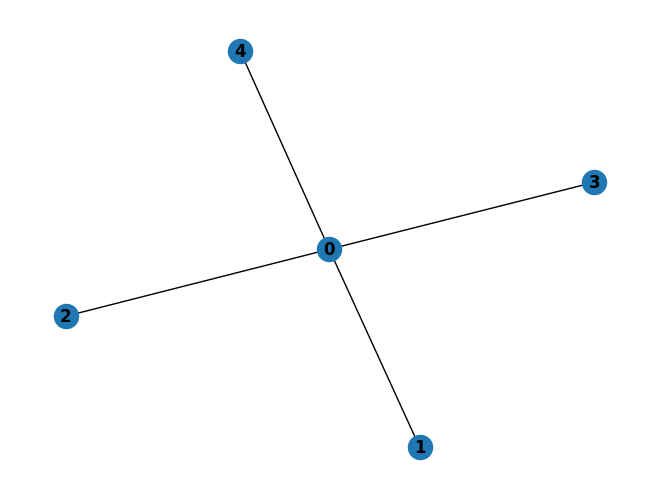

In [5]:
circ = CircuitTranspiler().routing(timesteps, initial_mapping)

(<Axes: >, <Figure size 1560x300 with 1 Axes>)

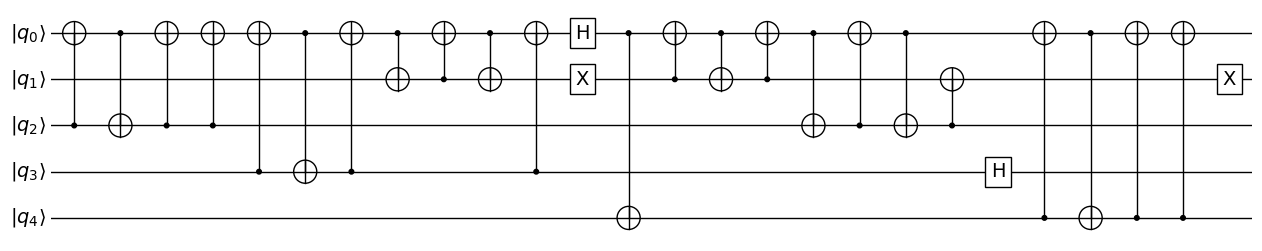

In [6]:
plot_circuit(circ)

In [64]:
test_g = gates.CNOT(0, 1)
test_g.target_qubits = (2,)
test_g.target_qubits

# test_g.control_qubits

(2,)

In [73]:
d = [(i.name, i.qubits, i) for i in c.queue]
te = ("cx", (0, 1))
ze = ("cx", (0, 2))

In [74]:
te == ze

False

In [24]:
for d in di:
    print(d.keys())

dict_keys(['cx'])
dict_keys(['cx'])
dict_keys(['cx'])
dict_keys(['x'])
dict_keys(['cx'])
dict_keys(['cx'])
dict_keys(['cx'])
dict_keys(['x'])
dict_keys(['h'])
dict_keys(['h'])
dict_keys(['cx'])
dict_keys(['cx'])
dict_keys(['cx'])


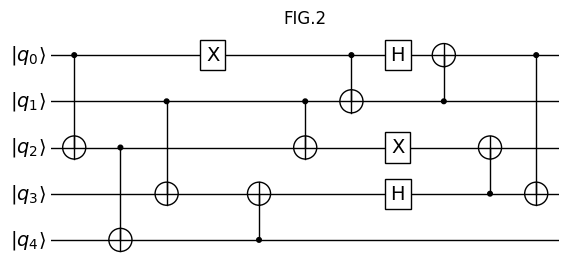

In [8]:
ax, fig = plot_circuit(c)
ax.set_title("FIG.2")
plt.show()

In [50]:
from collections import deque


def bfs_shortest_path(graph, start, goal):
    # Create a queue to store paths to explore and initialize it with the starting node
    queue = deque([[start]])

    # Set to keep track of visited nodes to avoid cycles
    visited = set([start])

    # If the start and goal are the same, we're done
    if start == goal:
        return [start]

    # Perform BFS
    while queue:
        # Get the first path from the queue
        path = queue.popleft()
        # Get the last node in the path
        node = path[-1]

        # Explore all neighbors of the current node
        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                # Create a new path by extending the current path
                new_path = list(path) + [neighbor]

                # If we reach the goal, return the path
                if neighbor == goal:
                    return new_path

                # Otherwise, add the new path to the queue and mark the node as visited
                queue.append(new_path)
                visited.add(neighbor)

    # If no path is found, return None
    return None


# Example usage:
edges = [(1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 6)]
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1)]
# Convert the edge list into an adjacency list representation
graph = {}
for u, v in edges:
    graph.setdefault(u, []).append(v)
    graph.setdefault(v, []).append(u)

# Find the shortest path between node 1 and node 6
shortest_path = bfs_shortest_path(graph, 1, 6)
print(f"Shortest path: {shortest_path}")

Shortest path: [1, 6]


In [52]:
import networkx as nx

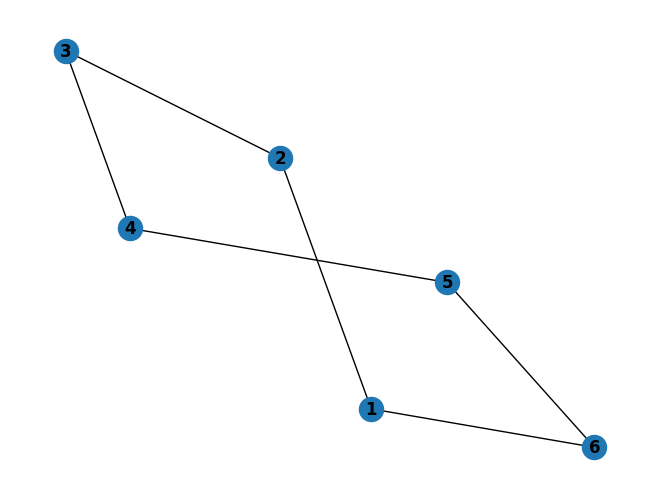

In [60]:
a = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1), (1, 6)]

G = nx.Graph(a)

nx.draw(G, with_labels=True, font_weight="bold")

In [61]:
list(G.edges)

[(1, 2), (1, 6), (2, 3), (3, 4), (4, 5), (5, 6)]

In [59]:
from networkx import astar_path


astar_path(G, 1, 5)

[1, 6, 5]